# Breadth First Search / Shortest Path

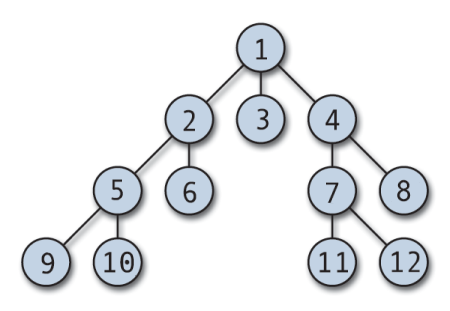

[Source: Wikimedia Commons](https://www.google.com/imgres?q=Breadth%20first%20search&imgurl=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fb%2Fbc%2FBreadth-first-tree.png&imgrefurl=https%3A%2F%2Fcommons.wikimedia.org%2Fwiki%2FFile%3ABreadth-first-tree.png&docid=CNhKCyVHuorcHM&tbnid=Hq0fAgkJDEkF7M&vet=12ahUKEwjw0aySmPiKAxUYpIkEHc_RLIIQM3oECBkQAA..i&w=450&h=311&hcb=2&itg=1&ved=2ahUKEwjw0aySmPiKAxUYpIkEHc_RLIIQM3oECBkQAA)

Key Use-Cases:

* Shortest path in an unweighted graph.
* Checking connectivity between nodes.
* Level-order traversal of a binary tree.

High-Level Approach:

* Use a queue (FIFO) data structure.
* Mark the starting node as visited, enqueue it.
* While queue is not empty:
* Dequeue a node, process it.
* Enqueue all unvisited neighbors, mark them visited.

## Adjacency Lists
Adjacency lists are $ O(V + E) $ where $V$ is the number of vertices and $E$ is the number of edges

Best used when the graph is sparse (not all nodes are connected to each other)



In [1]:
from collections import deque

def shortest_path(graph, start, target):
    """
    graph: adjacency list {node: [neighbors]}
    start, target: nodes in the graph
    Returns the shortest path length from start to target
    """
    visited = set([start])
    queue = deque([(start, 0)])  # (node, distance)
    
    while queue:
        node, dist = queue.popleft()
        if node == target:
            return dist  # Found the shortest path
        
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, dist + 1))
    
    return -1  # Target not reachable


In [3]:
def traverse_neighbor(graph, node, visited, queue, dist):
    for neighbor in graph[node]:
        if neighbor not in visited:
            visited.add(neighbor)
            queue.append((neighbor, dist + 1))


def refactored_shortest_path(graph, start, target):
    """
    graph: adjacency list {node: [neighbors]}
    start, target: nodes in the graph
    Returns the shortest path length from start to target
    """
    visited = set([start])
    queue = deque([(start, 0)])  # (node, distance)
    
    while queue:
        node, dist = queue.popleft()
        if node == target:
            return dist  # Found the shortest path
        
        traverse_neighbor(graph=graph, node=node, visited=visited, queue=queue, dist=dist)
    
    return -1  # Target not reachable

In [4]:
# Example graph represented as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Example usage of the shortest_path function
start_node = 'A'
target_node = 'F'
path_length = shortest_path(graph, start_node, target_node)
print(f"The shortest path from {start_node} to {target_node} is {path_length} edges long.")
path_length = refactored_shortest_path(graph, start_node, target_node)
print(f"The shortest path from {start_node} to {target_node} is {path_length} edges long.")

The shortest path from A to F is 2 edges long.
The shortest path from A to F is 2 edges long.


## Adjacency Matrices

Best used if the graph is fully connected to each node. Symmetric for undirected graphs, directed graphs are not necessarily symmetric. Can also be weighted. Better for fast lookups but bad for space.

Lookup is $O(1)$
Space complexity is $O(V^2)$

In [ ]:
from collections import deque

def shortest_path_matrix(matrix, start, target):
    """
    matrix: adjacency matrix (list of lists) for an unweighted graph
    start, target: indices of the vertices in [0..V-1]
    Returns the shortest path length from start to target, or -1 if not reachable.
    """
    V = len(matrix)           # Number of vertices
    visited = set([start])
    queue = deque([(start, 0)])  # (current_node, distance_from_start)
    
    while queue:
        node, dist = queue.popleft()
        
        # If we've reached the target, return the distance
        if node == target:
            return dist
        
        # Look at every possible neighbor
        for neighbor in range(V):
            # Check if there's an edge from 'node' to 'neighbor'
            if matrix[node][neighbor] == 1 and neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, dist + 1))
    
    # Target wasn't found
    return -1


In [2]:
from collections import deque


def traverse_neighbors(matrix, node, neighbor, visited, queue, dist):
    # Check if there's an edge from 'node' to 'neighbor'
    if matrix[node][neighbor] == 1 and neighbor not in visited:
        visited.add(neighbor)
        queue.append((neighbor, dist + 1))

def shortest_path_matrix_refactor(matrix, start, target):
    """
    matrix: adjacency matrix (list of lists) for an unweighted graph
    start, target: indices of the vertices in [0..V-1]
    Returns the shortest path length from start to target, or -1 if not reachable.
    """
    V = len(matrix)           # Number of vertices
    visited = set([start])
    queue = deque([(start, 0)])  # (current_node, distance_from_start)
    
    while queue:
        node, dist = queue.popleft()
        
        # If we've reached the target, return the distance
        if node == target:
            return dist
        
        # Look at every possible neighbor
        for neighbor in range(V):
            traverse_neighbors(matrix, node, neighbor, visited, queue, dist)
    
    # Target wasn't found
    return -1


In [3]:
# Example adjacency matrix for an unweighted graph
matrix = [
    [0, 1, 1, 0, 0, 0],
    [1, 0, 0, 1, 1, 0],
    [1, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1],
    [0, 0, 1, 0, 1, 0]
]

# Example usage of the shortest_path_matrix_refactor function
start_node = 0  # Corresponds to 'A'
target_node = 5  # Corresponds to 'F'
path_length = shortest_path_matrix_refactor(matrix, start_node, target_node)
print(f"The shortest path from node {start_node} to node {target_node} is {path_length} edges long.")

The shortest path from node 0 to node 5 is 2 edges long.


## Depth-first search
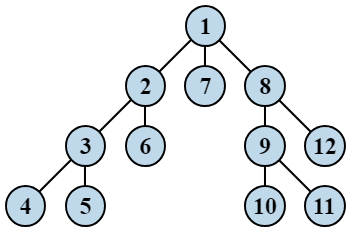

[Source: Wikimedia Commons](https://www.google.com/imgres?q=Depth%20first%20search&imgurl=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F6%2F60%2FDepth-first_tree.svg&imgrefurl=https%3A%2F%2Fcommons.wikimedia.org%2Fwiki%2FFile%3ADepth-first_tree.svg&docid=Odkw2w0uDbkIlM&tbnid=ZNh_CiHFfNRHwM&vet=12ahUKEwisre3ul_iKAxWArYkEHRMWFnYQM3oECBwQAA..i&w=350&h=232&hcb=2&ved=2ahUKEwisre3ul_iKAxWArYkEHRMWFnYQM3oECBwQAA)

Key use cases:
* Detecting cycles in a graph.
* All paths from A to B.
* Backtracking solutions (combinations, permutations, etc.).

High-Level Approach:

* Use a stack (LIFO) or recursion.
* Visit a node, process it.
* Recursively explore its neighbors.
* Backtrack once a path is fully explored.

In [4]:
def dfs(graph, start, visited):
    stack = [start]
    visited.add(start)
    while stack:
        node = stack.pop()
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                stack.append(neighbor)

def count_components(graph):
    visited = set()
    components = 0
    for node in graph:
        if node not in visited:
            dfs(graph, node, visited)
            components += 1
    return components


In [10]:
# Convert adjacency matrix to adjacency list
def matrix_to_adj_list(matrix):
    adj_list = {i: [] for i in range(len(matrix))}
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == 1:
                adj_list[i].append(j)
    return adj_list

# Convert the given matrix to adjacency list
graph = matrix_to_adj_list(matrix)

start_node = 2


# Execute the dfs function
visited = set()
dfs(graph, start_node, visited)
print(matrix)
print(f"Nodes visited from start node {start_node}: {visited}")

components = count_components(graph)
print(f"Number of components: {components}")

[[0, 1, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0], [1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0]]
Nodes visited from start node 2: {0, 1, 2, 3, 4, 5}
Number of components: 1


# Binary Search

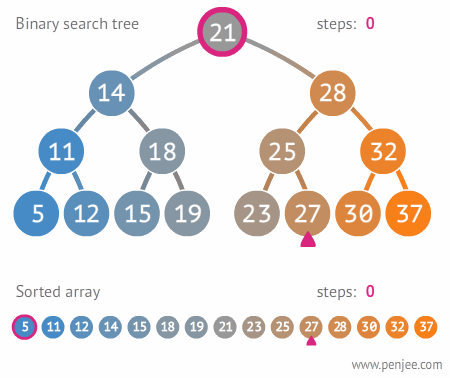

[Source: Wikimedia Commons](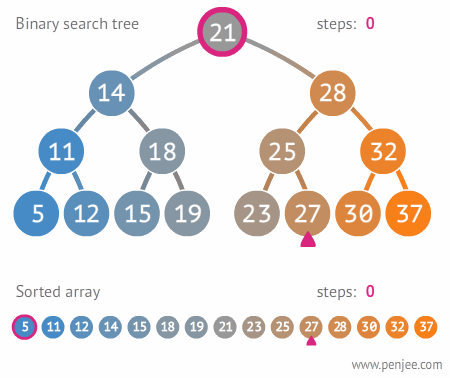)



Key Use-Cases:

* Searching in a sorted array.
* Searching for a boundary condition (e.g., “first element greater than X”).
* Guessing an answer and adjusting (e.g., “minimize the maximum distance” problems).

High-Level Approach:

* Maintain left and right pointers.
* Compute mid = (left + right) // 2.
* If arr[mid] satisfies the condition, adjust right; otherwise adjust left.
* Repeat until left > right.

In [16]:
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        print(f"mid: {mid}")
        if arr[mid] == target:
            print(f"Found target")            
            return mid
        elif arr[mid] < target:
            print(f"Index of mid is < than target")            
            left = mid + 1
        else:
            print(f"Index of mid is > than target")            
            right = mid - 1
    return -1


In [17]:
# Unsorted integer array
unsorted_array = [9, 3, 1, 7, 5, 2, 8, 6, 4, 0]

# Sorting the array
sorted_array = sorted(unsorted_array)

print(f"Unsorted array: {unsorted_array}")
print(f"Sorted array: {sorted_array}")

Unsorted array: [9, 3, 1, 7, 5, 2, 8, 6, 4, 0]
Sorted array: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [18]:
# Example sorted array
arr = sorted_array

# Target value to search for
target = 7

# Use the binary_search function to find the target
index = binary_search(arr, target)

if index != -1:
    print(f"Target {target} found at index {index}.")
else:
    print(f"Target {target} not found in the array.")

mid: 4
Index of mid is < than target
mid: 7
Found target
Target 7 found at index 7.


## Two Pointers & Sliding Window

Key Use-Cases:

* “Two-sum” in a sorted array.
* Find a subarray with a given sum.
* Find the longest substring with certain constraints (sliding window).

High-Level Approach:

* For two pointers (often in a sorted array), have a left pointer at the start, a right pointer at the end.
* Move pointers inward based on sum comparisons or other conditions.
* For sliding window, maintain a window boundary [start, end], adjusting start or end to satisfy constraints.


How it works
Initialize:

A set (char_set) to store the characters currently in the sliding window.
left to mark the start of the window.
max_length to keep track of the longest valid substring seen so far.
Iterate with right:

The right pointer loops over each character in the string.
If s[right] is not in char_set, it means we can add it directly to the window without causing duplicates.
If s[right] is in char_set, it means adding s[right] would introduce a duplicate. We therefore move the left pointer to shrink the window from the left (removing characters from char_set accordingly) until s[right] can be safely added.
Update max_length:

After adjusting left (if needed) and adding s[right] to the set, we measure the current window size (right - left + 1).
Update max_length if the current window is longer than the previously recorded one.
Return max_length:

After processing all characters, max_length holds the length of the longest substring without repeating characters.

Time Complexity
We move the right pointer from 0 to len(s) - 1.
For each position of right, in the worst case, we might move the left pointer forward (but notice that once left advances, it won’t go backward).
Essentially, each character is visited at most twice: once by the right pointer and once by the left pointer during the window shrinking step.
Therefore, the time complexity is O(N), where 
𝑁
N is the length of the string.
Space Complexity
We use a set (char_set) to store characters that are currently in our window.
In the worst case (e.g., a string with all unique characters), the set can grow up to the length of the string.
Hence, the space complexity is O(N) in the worst case. If the character set is limited (e.g., fixed ASCII set), then the space complexity can also be considered O(1) with a bound of 128 or 256, etc. But in the general case (arbitrary Unicode), it’s O(N).

In [28]:
def length_of_longest_substring(s):
    char_set = set()
    max_length = 0
    left = 0


    for right in range(len(s)):        
        while s[right] in char_set:
            char_set.remove(s[left])
            left += 1
        char_set.add(s[right])
        max_length = max(max_length, right - left + 1)
    
    return max_length


In [45]:
def adjust_left_pointer_if_duplicate_in_set(char_set, left, right, s):
    new_left = left
    while s[right] in char_set:            
        char_set.remove(s[new_left])        
        new_left += 1
    return new_left

def length_of_longest_substring_refactor(s):
    char_set = set()
    N = len(s)
    max_length = 0
    left = 0

    for right in range(N):
        left = adjust_left_pointer_if_duplicate_in_set(char_set=char_set, left=left, right=right, s=s)    
        char_set.add(s[right])
        max_length = max(max_length, right - left + 1)
    
    return max_length


In [47]:
# Example string
s = "abcabcbb"

# Use the length_of_longest_substring function to find the length of the longest substring without repeating characters
longest_substring_length = length_of_longest_substring(s)

print(f"The length of the longest substring without repeating characters in '{s}' is {longest_substring_length}.")

longest_substring_length = length_of_longest_substring_refactor(s)

print(f"The length of the longest substring without repeating characters in '{s}' is {longest_substring_length}.")

The length of the longest substring without repeating characters in 'abcabcbb' is 3.
The length of the longest substring without repeating characters in 'abcabcbb' is 3.


## Two-pointer technique

Useful for palindromes

In [48]:
def longest_palindromic_substring(s):
    res = ""
    for i in range(len(s)):
        # Odd length palindrome
        left, right = i, i
        while left >= 0 and right < len(s) and s[left] == s[right]:
            if (right - left + 1) > len(res):
                res = s[left:right+1]
            left -= 1
            right += 1
        
        # Even length palindrome
        left, right = i, i+1
        while left >= 0 and right < len(s) and s[left] == s[right]:
            if (right - left + 1) > len(res):
                res = s[left:right+1]
            left -= 1
            right += 1
    return res


In [63]:
def two_pointer_compare(left, right, N, s):
    res = ""
    while left >= 0 and right < N and s[left] == s[right]:
        if (right - left + 1) > len(res):
            res = s[left:right+1]
        left -= 1
        right += 1
    return res

def longest_palindromic_substring_refactored(s):
    N = len(s)
    best = ""
    for i in range(N):
        # Odd-length palindromes
        odd_pal = two_pointer_compare(i, i, N, s)
        if len(odd_pal) > len(best):
            best = odd_pal
        
        # Even-length palindromes
        even_pal = two_pointer_compare(i, i+1, N, s)
        if len(even_pal) > len(best):
            best = even_pal
    
    return best


In [64]:
s = "stats"
count = longest_palindromic_substring(s)
print(count)

count = longest_palindromic_substring_refactored(s)
print(count)


stats
stats


## Almost Palindrome

Problem Statement

A string is considered an “almost palindrome” if it can become a palindrome by modifying at most one character. For instance, "abca" is almost a palindrome because changing the last character 'a' to 'b' (making "abcb") would make it a palindrome.

High-Level Two-Pointer Approach

* Use the classic two-pointer palindrome check.
* If s[left] != s[right], try skipping either the left or right character and continue checking.
* If you can fix the mismatch by a single skip, the string is almost a palindrome.


In [ ]:
def almost_palindrome(s):
    def is_palin_range(i, j):
        # Helper to check palindrome in [i..j]
        while i < j:
            if s[i] != s[j]:
                return False
            i += 1
            j -= 1
        return True
    
    left, right = 0, len(s) - 1
    while left < right:
        if s[left] != s[right]:
            # Skip one char from either side and check again
            return is_palin_range(left+1, right) or is_palin_range(left, right-1)
        left += 1
        right -= 1
    return True


# Graph Problems

## Topological Sort (AKA Kahn's Algorithm)

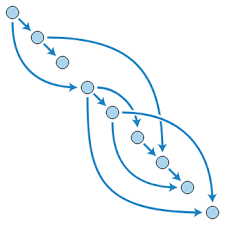

[Source: Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Topological_Ordering.svg)


This function implements Kahn’s Algorithm to produce a topological ordering of the nodes in a directed graph. A topological ordering lists nodes in such a way that every directed edge 𝑢 → 𝑣 goes from a node 𝑢 earlier in the ordering to a node 𝑣 later in the ordering.


Steps of Kahn’s Algorithm

1. Build in-degree counts:
    * For each node, calculate the number of incoming edges (this is the node’s in-degree).
2. Initialize a queue with 0 in-degree nodes:
    * Find all nodes that have no incoming edges and put them in a queue.
3. Process the queue:
    * While the queue is not empty:
        * Remove a node from the queue and add it to the topological order.
        * For each of its outgoing edges, reduce the in-degree of the target node by 1.
        * If a target node’s in-degree becomes 0, add it to the queue.
4. Check for cycles:
    * If the number of nodes in the final order is less than the total number of nodes, a cycle exists (and thus a valid topological ordering is not possible).

Key Use Cases

* Task Scheduling / Job Scheduling: Determining an order to complete tasks such that all prerequisites are met first.
* Build Systems: Computing the order in which software components or modules must be built (so dependencies are compiled before dependents).
* Dependency Resolution: In package managers (e.g., installing software packages in an order that respects their dependencies).
* Course Prerequisites Planning: Figuring out in which semester courses can be taken so that prerequisites are completed beforehand.

Complexity

$ O(V + E) $ due to adjacency list creation and breadth search

In [1]:
from collections import deque

def topological_sort(num_nodes, edges):
    graph = {i: [] for i in range(num_nodes)}
    indegree = [0] * num_nodes
    
    # Build graph and indegree count
    for u, v in edges:
        graph[u].append(v)
        indegree[v] += 1
    
    # Initialize queue with nodes of 0 indegree
    queue = deque([i for i in range(num_nodes) if indegree[i] == 0])
    topo_order = []
    
    while queue:
        node = queue.popleft()
        topo_order.append(node)
        for neighbor in graph[node]:
            indegree[neighbor] -= 1
            if indegree[neighbor] == 0:
                queue.append(neighbor)
    
    if len(topo_order) == num_nodes:
        return topo_order  # Valid topological ordering
    else:
        return []  # Cycle exists or not all nodes covered


In [2]:
# Example graph represented as a list of edges
num_nodes = 6
edges = [
    (5, 2),
    (5, 0),
    (4, 0),
    (4, 1),
    (2, 3),
    (3, 1)
]

# Perform topological sort
topo_order = topological_sort(num_nodes, edges)

if topo_order:
    print(f"Topological ordering of the graph: {topo_order}")
else:
    print("The graph has a cycle, so a topological ordering is not possible.")

Topological ordering of the graph: [4, 5, 2, 0, 3, 1]


# Matrix & 2D Array Problems

Typical Scenario: You might need to search a matrix, perform a flood-fill, or handle path-finding in a grid.

Key Use-Cases:

* Flood fill (connected regions).
* Spiral matrix traversal.
* Shortest path in a grid (BFS in 2D).

In [3]:
def flood_fill(image, sr, sc, new_color):
    rows, cols = len(image), len(image[0])
    old_color = image[sr][sc]
    if old_color == new_color:
        return image
    
    def fill(r, c):
        if r < 0 or r >= rows or c < 0 or c >= cols:
            return
        if image[r][c] == old_color:
            image[r][c] = new_color
            fill(r+1, c)
            fill(r-1, c)
            fill(r, c+1)
            fill(r, c-1)
    
    fill(sr, sc)
    return image


In [5]:
# Example image represented as a 2D array
image = [
    [1, 1, 1],
    [1, 1, 0],
    [1, 0, 1]
]

# Starting point (sr, sc) and new color
sr, sc = 1, 1
new_color = 2

print("Original image:")
for row in image:
    print(row)


# Perform flood fill
result_image = flood_fill(image, sr, sc, new_color)


print("\nImage after flood fill:")
for row in result_image:
    print(row)

Original image:
[1, 1, 1]
[1, 1, 0]
[1, 0, 1]

Image after flood fill:
[2, 2, 2]
[2, 2, 0]
[2, 0, 1]


## Bit Manipulation

Typical Use-Cases

* Counting the number of set bits (1-bits) in an integer (sometimes referred to as the “population count”).
* Checking if a number is a power of two.
* Performing XOR-based operations (e.g., find the missing element in an array of duplicates).

Example: Single Number

You have an array where every element appears twice except for one. Find that single element using O(1) extra space.
Approach: 
    XOR all elements; 
    duplicates cancel out, leaving only the unique element.

The result ^= num operation is used to find the single non-duplicate number in an array where every other number appears twice. This works because of the properties of the XOR operation:

* XOR of a number with itself is 0: a ^ a = 0
* XOR of a number with 0 is the number itself: a ^ 0 = a
* XOR is commutative and associative: a ^ b ^ a = b ^ (a ^ a) = b ^ 0 = b

Given an array where every element appears twice except for one, XORing all the elements together will cancel out the numbers that appear twice, leaving only the single non-duplicate number.

Here's how it works step-by-step:

* Initialize result to 0.
* Iterate through each number in the array.
* XOR each number with result and store the result back in result.
* At the end of the iteration, result will hold the non-duplicate number.


In [6]:
def single_number(nums):
    result = 0
    for num in nums:
        result ^= num
    return result


In [7]:
# Example array where every element appears twice except for one
nums = [4, 1, 2, 1, 2]

# Use the single_number function to find the single element
unique_element = single_number(nums)

print(f"The single element in the array is {unique_element}.")

The single element in the array is 4.
